Shape: (5572, 2)
Columns: ['label', 'message']


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Train/Test sizes: (4457,) (1115,)


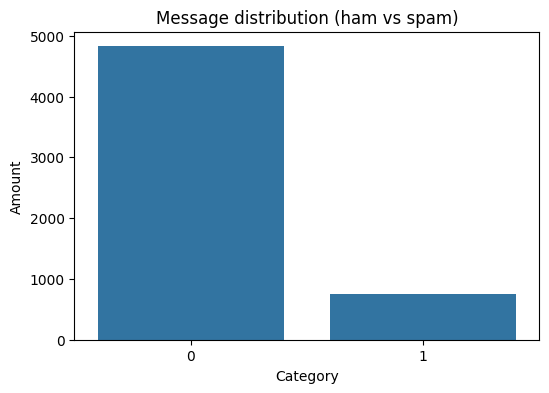

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset/spam.csv", encoding="latin-1")

df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], errors='ignore')

df = df.rename(columns={"v1": "label", "v2": "message"})

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

df = df.dropna(subset=["label", "message"])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test sizes:", X_train.shape, X_test.shape)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label")
plt.title("Message distribution (ham vs spam)")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=cm, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"Matriz de Confusão - {title}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,2))

X_train_vect = tfidf.fit_transform(X_train)   
X_test_vect  = tfidf.transform(X_test)       


print("Shape treino:", X_train_vect.shape)
print("Shape teste:", X_test_vect.shape)



Shape treino: (4457, 12128)
Shape teste: (1115, 12128)


Accuracy: 0.9641255605381166
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.88      0.85      0.86       149

    accuracy                           0.96      1115
   macro avg       0.93      0.92      0.92      1115
weighted avg       0.96      0.96      0.96      1115



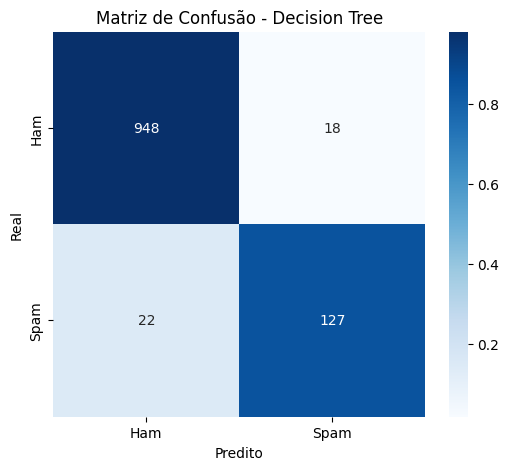

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_vect, y_train)
y_pred_dt = dt.predict(X_test_vect)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")



Accuracy: 0.9174887892376682
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.38      0.55       149

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



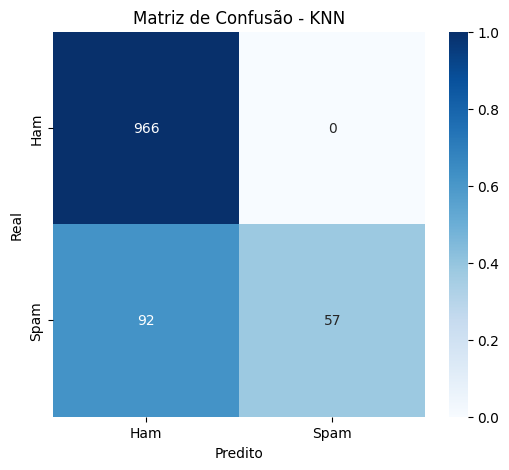

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vect, y_train)
y_pred_knn = knn.predict(X_test_vect)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
plot_conf_matrix(y_test, y_pred_knn, "KNN")


Accuracy: 0.9695067264573991
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.78      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



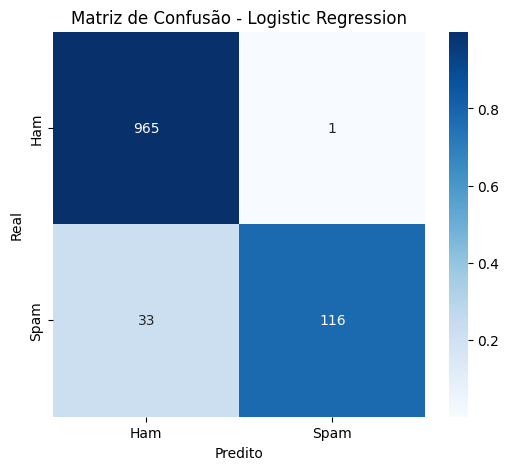

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train_vect, y_train)
y_pred_lr = lr.predict(X_test_vect)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")


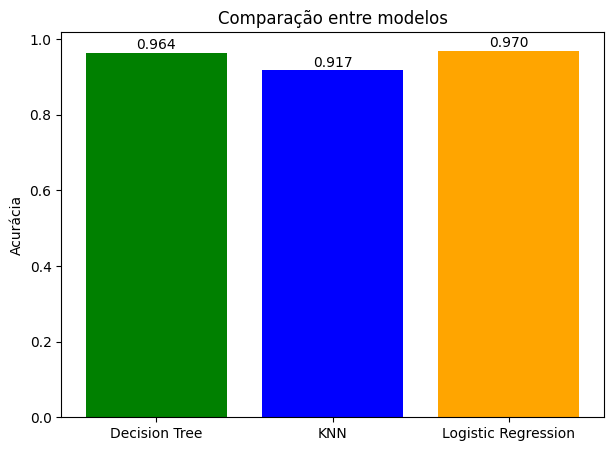

In [11]:
import matplotlib.pyplot as plt

acc_tree = accuracy_score(y_test, y_pred_dt)
acc_knn  = accuracy_score(y_test, y_pred_knn)
acc_lr   = accuracy_score(y_test, y_pred_lr)

modelos = ["Decision Tree", "KNN", "Logistic Regression"]
scores = [acc_tree, acc_knn, acc_lr]

plt.figure(figsize=(7,5))
plt.bar(modelos, scores, color=['green','blue','orange'])
plt.ylabel("Acurácia")
plt.title("Comparação entre modelos")
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()
